# Lab 1: Suspicious Transaction Data Analysis and Decision Support System

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
customer = pd.read_csv("Customer_Master.csv")
transaction = pd.read_csv("transactions.csv")

In [4]:
#displays top 4 data of customer
customer.head(4)

,customer_id,age_group,home_location,credit_score,account_age_years,account_type,avg_monthly_income,mobile_banking_user,primary_device,primary_os,primary_browser,avg_transaction_amount,transaction_frequency,employment_status,preferred_transaction_types,international_activity,risk_score
0,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,Samsung Internet,6498.703229,22,Self-employed,"['Loan Payment', 'Internet Bill Payment', 'Wat...",True,30
1,2,26-35,Kathmandu,607,7,Savings,34640.469961,True,Android Tablet,Android,Chrome,3946.766234,6,Employed,"['Loan Payment', 'Branch Deposit', 'QR Payment...",True,33
2,3,56-65,Mustang,589,10,Savings,37965.867755,True,Android Tablet,Android,Edge,13286.477126,27,Employed,"['Branch Deposit', 'Electricity Bill Payment',...",False,8
3,4,46-55,Biratnagar,609,8,Savings,22131.661183,True,iPhone,iOS,Safari,5199.307947,19,Self-employed,"['Insurance Premium Payment', 'Branch Withdraw...",False,18


In [5]:
#displays top 4 data of transaction
transaction.head(4)

,transaction_id,customer_id,transaction_date,transaction_type,amount,location,ip_address,device,os,browser,...,credit_score,account_age_years,account_type,avg_monthly_income,mobile_banking_user,transaction_frequency,employment_status,international_activity,risk_score,is_suspicious
0,TXN20241124104326,727,11/24/2024 15:29,Inward Remittance,13925.72,Nawalparasi,103.92.86.139,NaN,NaN,NaN,...,673,1,Current,65911.89284,True,20,Employed,False,24,False
1,TXN20241204130277,539,12/04/2024 05:26,ATM Withdrawal,25037.35,Kaski,27.201.191.54,NaN,NaN,NaN,...,666,11,Current,75126.72458,True,3,Employed,False,19,False
2,TXN20240813940494,84,8/13/2024 22:42,Cheque Deposit,6677.66,Pokhara,27.231.166.66,NaN,NaN,NaN,...,474,5,Savings,33904.26167,True,14,Employed,False,42,False
3,TXN20240213270855,660,2/13/2024 10:51,School Fee Payment,16071.37,Biratnagar,43.122.204.45,NaN,NaN,NaN,...,680,6,Savings,51961.55841,False,8,Employed,False,26,False


In [6]:
#Common columns that exist in both the customer and transaction datasets
duplicate_cols = set(customer.columns).intersection(set(transaction.columns))
duplicate_cols

{'account_age_years',
 'account_type',
 'age_group',
 'avg_monthly_income',
 'credit_score',
 'customer_id',
 'employment_status',
 'home_location',
 'international_activity',
 'mobile_banking_user',
 'risk_score',
 'transaction_frequency'}

In [7]:
duplicate_cols = duplicate_cols - {'customer_id'}
duplicate_cols

{'account_age_years',
 'account_type',
 'age_group',
 'avg_monthly_income',
 'credit_score',
 'employment_status',
 'home_location',
 'international_activity',
 'mobile_banking_user',
 'risk_score',
 'transaction_frequency'}

In [8]:
# Drop the duplicate columns from the transaction dataset
transaction = transaction.drop(columns= duplicate_cols)

In [9]:
#List common columns
duplicate_cols = set(customer.columns).intersection(set(transaction.columns))
duplicate_cols

{'customer_id'}

In [10]:
dataset = customer.merge(transaction, on="customer_id", how="inner")

In [11]:
dataset.head(5)

,customer_id,age_group,home_location,credit_score,account_age_years,account_type,avg_monthly_income,mobile_banking_user,primary_device,primary_os,...,device,os,browser,attempt_sequence,time_of_day,transaction_velocity,status,auth_method,amount_deviation,is_suspicious
0,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,NaN,NaN,NaN,1,Evening,1,Success,Face Recognition,1.493718,False
1,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,NaN,NaN,NaN,1,Evening,1,Success,Password,0.776204,False
2,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,NaN,NaN,NaN,1,Late Night,1,Success,Face Recognition,1.211956,False
3,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,NaN,NaN,NaN,1,Early Morning,4,Success,PIN,1.236164,False
4,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,NaN,NaN,NaN,1,Early Morning,1,Success,OTP,1.292338,False


In [12]:
dataset.columns

Index(['customer_id', 'age_group', 'home_location', 'credit_score',
       'account_age_years', 'account_type', 'avg_monthly_income',
       'mobile_banking_user', 'primary_device', 'primary_os',
       'primary_browser', 'avg_transaction_amount', 'transaction_frequency',
       'employment_status', 'preferred_transaction_types',
       'international_activity', 'risk_score', 'transaction_id',
       'transaction_date', 'transaction_type', 'amount', 'location',
       'ip_address', 'device', 'os', 'browser', 'attempt_sequence',
       'time_of_day', 'transaction_velocity', 'status', 'auth_method',
       'amount_deviation', 'is_suspicious'],
      dtype='object')

In [13]:
dataset.isna().sum()

customer_id                        0
age_group                          0
home_location                      0
credit_score                       0
account_age_years                  0
account_type                       0
avg_monthly_income                 0
mobile_banking_user                0
primary_device                 14202
primary_os                     14202
primary_browser                14202
avg_transaction_amount             0
transaction_frequency              0
employment_status                  0
preferred_transaction_types        0
international_activity             0
risk_score                         0
transaction_id                     0
transaction_date                   0
transaction_type                   0
amount                             0
location                           0
ip_address                         0
device                         79991
os                             79963
browser                        79967
attempt_sequence                   0
t

In [14]:
dataset.shape

(103500, 33)

In [15]:
dataset.drop(columns=["device", "os", "browser", "attempt_sequence"], inplace= True)

In [16]:
dataset.duplicated().sum()

np.int64(0)

In [17]:
dataset.isna().sum()

customer_id                        0
age_group                          0
home_location                      0
credit_score                       0
account_age_years                  0
account_type                       0
avg_monthly_income                 0
mobile_banking_user                0
primary_device                 14202
primary_os                     14202
primary_browser                14202
avg_transaction_amount             0
transaction_frequency              0
employment_status                  0
preferred_transaction_types        0
international_activity             0
risk_score                         0
transaction_id                     0
transaction_date                   0
transaction_type                   0
amount                             0
location                           0
ip_address                         0
time_of_day                        0
transaction_velocity               0
status                             0
auth_method                        0
a

In [18]:
# Fill null values in device, OS, and browser columns with their respective mode
dataset["primary_device"].fillna(dataset["primary_device"].mode()[0], inplace= True)
dataset["primary_os"].fillna(dataset["primary_os"].mode()[0], inplace= True)
dataset["primary_browser"].fillna(dataset["primary_browser"].mode()[0], inplace= True)

C:\Users\saisa\AppData\Local\Temp\ipykernel_1520\1228566773.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["primary_device"].fillna(dataset["primary_device"].mode()[0], inplace= True)
C:\Users\saisa\AppData\Local\Temp\ipykernel_1520\1228566773.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [19]:
dataset.head(5)

,customer_id,age_group,home_location,credit_score,account_age_years,account_type,avg_monthly_income,mobile_banking_user,primary_device,primary_os,...,transaction_type,amount,location,ip_address,time_of_day,transaction_velocity,status,auth_method,amount_deviation,is_suspicious
0,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,Internet Bill Payment,9707.23,Palpa,27.86.22.5,Evening,1,Success,Face Recognition,1.493718,False
1,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,Internet Bill Payment,5044.32,Palpa,210.62.41.218,Evening,1,Success,Password,0.776204,False
2,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,Water Bill Payment,7876.14,Palpa,210.51.34.80,Late Night,1,Success,Face Recognition,1.211956,False
3,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,POS Transaction,8033.46,Palpa,43.26.97.5,Early Morning,4,Success,PIN,1.236164,False
4,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,Loan Payment,8398.52,Palpa,103.233.246.4,Early Morning,1,Success,OTP,1.292338,False


In [20]:
dataset['age_group'].isna().sum()

np.int64(0)

## 1. Checking type of transaction that is suspicious

In [21]:
# Grouping
sus_by_transaction_type = (
    dataset.groupby('transaction_type')['is_suspicious']
    .agg(['sum', 'count', 'mean'])
    .sort_values(by='mean', ascending=False)
)
print(sus_by_transaction_type)

                              sum  count      mean
transaction_type                                  
Mobile Banking Transfer      1425   4775  0.298429
ATM Withdrawal                837   4947  0.169193
Wallet Load - eSewa           608   4514  0.134692
QR Payment                    534   4382  0.121862
Mobile Banking Bill Payment   546   4652  0.117369
Branch Deposit                343   4161  0.082432
Electricity Bill Payment      154   3843  0.040073
Cheque Deposit                144   3626  0.039713
Water Bill Payment            146   3822  0.038200
POS Transaction               141   3836  0.036757
Internet Bill Payment         140   3877  0.036110
Outward Remittance            135   3849  0.035074
Hotel Booking Payment         139   4021  0.034569
Airline Ticket Payment        123   3840  0.032031
Interest Credit               119   3722  0.031972
Mobile Recharge               133   4245  0.031331
School Fee Payment            129   4159  0.031017
Inward Remittance             1

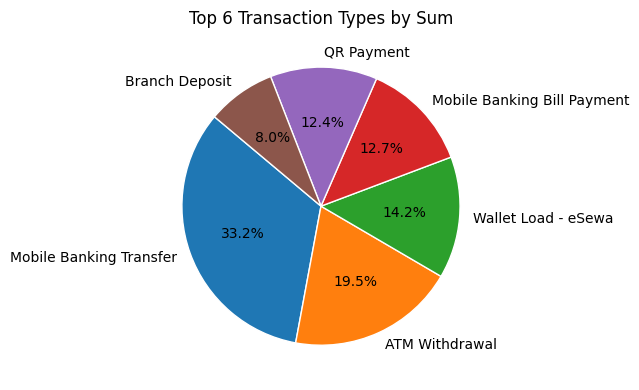

In [22]:
# Reset index so transaction_type becomes a column again
sus_by_transaction_type = sus_by_transaction_type.reset_index()

# Select top 6
top6 = sus_by_transaction_type.sort_values('sum', ascending=False).head(6)

plt.figure(figsize=(8, 4))
plt.pie(
    top6['sum'],
    labels=top6['transaction_type'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Top 6 Transaction Types by Sum')
plt.tight_layout()
plt.show()

The pie chart highlights suspicious activity is concentrated in a few key transaction types, led by Mobile Banking Transfers, followed by ATM Withdrawals and Wallet Load (eSewa). These patterns show that fraud is more common in digital, self-service channels. QR Payments, Mobile Banking Bill Payments, and Branch Deposits also contribute meaningfully, indicating a mix of online and branch-related fraud risks.

Solving strategies:
    
    -Mobile Banking Transfer
Strengthen device fingerprinting, enforce stepped-up authentication for unusual transfer patterns, and implement velocity checks for rapid consecutive transfers.
    
    -ATM Withdrawal
Deploy enhanced ATM monitoring (skimming detection), restrict high-risk withdrawal patterns, and apply geo-based anomaly detection for unusual locations or withdrawal frequencies.
    
    -Wallet Load – eSewa
Enforce transaction-amount caps, monitor repeated wallet-loading spikes, and integrate real-time partner-wallet fraud scoring systems.
    
    -QR Payment
Validate merchant identities, flag repeated micro-transactions to unknown merchants, and apply behavioral biometrics for QR-initiated actions.
    
    -Mobile Banking Bill Payment
Detect abnormal biller changes, irregular amounts, or multiple payments to the same biller in short time windows.
    
    -Branch Deposit
Strengthen teller-side KYC verification, monitor deposited amounts for structuring behaviors, and cross-check deposit anomalies with customer risk profiles. 


## 2. Suspicious based on time of day

In [23]:
sus_by_time = (
 dataset.groupby('time_of_day')['is_suspicious']
 .agg(['sum', 'mean'])
 .sort_values(by = 'sum', ascending=False)
 .reset_index()
)
print(sus_by_time)

      time_of_day   sum      mean
0           Night  1907  0.137115
1  Business Hours  1434  0.042668
2      Late Night  1401  0.054545
3   Early Morning  1031  0.077864
4         Evening   988  0.057920


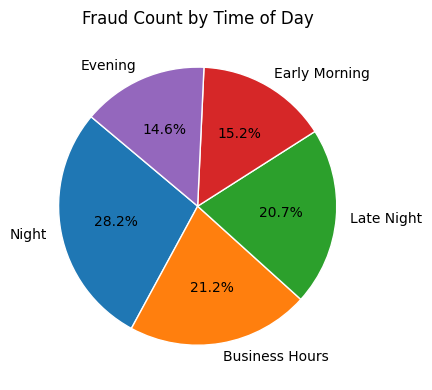

In [24]:
plt.figure(figsize=(8,4))
plt.pie(
    sus_by_time['sum'],
    labels=sus_by_time['time_of_day'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Fraud Count by Time of Day')
plt.tight_layout()
plt.show()

The visualization shows that most suspicious activity occurs at Night,followed by Business
Hours and Late Night. Early Morning and Evening contribute smaller but still meaningful 
shares. The pattern suggests heightened fraud attempts during off-peak periods when 
monitoring and customer activity are lower.

Solving strategies:
   
    -Night/Late Night
Configure the DSS to trigger higher-risk scores, enforce stronger authentication, and 
enable real-time alerts during low-activity hours.

    -Business Hours
Use DSS rule-based filters to detect abnormal transaction bursts and support staff with 
automated flagging workflows.

    -Early Morning/Evening
Apply adaptive thresholds in the DSS that adjust based on historical behavior, highlighting
unusual timing patterns even in moderate-risk periods.

## 3. Suspicious based on location

In [25]:
sus_by_location = (
 dataset.groupby('location')['is_suspicious']
 .agg(['sum', 'mean'])
 .sort_values(by = 'sum', ascending= False)
)
print(sus_by_location)

              sum      mean
location                   
Kathmandu     396  0.020643
Pokhara       270  0.032032
Birgunj       249  0.057546
Bhaktapur     244  0.051597
Lalitpur      228  0.051213
Ilam          225  0.069103
Biratnagar    219  0.045540
Hetauda       218  0.062662
Chitwan       218  0.069338
Butwal        206  0.076637
Itahari       204  0.080473
Dharan        203  0.058233
Janakpur      201  0.076021
Nepalgunj     187  0.074118
Dhangadhi     185  0.088900
Syangja       183  0.197198
Sindhuli      170  0.184783
Kailali       167  0.170234
Dolakha       167  0.178419
Bardibas      166  0.180043
Delhi         162  1.000000
Jeetpur       161  0.177508
Ramechhap     160  0.170576
Kalaiya       156  0.163522
Bardiya       153  0.160042
Birtamode     138  0.154190
Abu Dhabi      92  1.000000
Bangkok        87  1.000000
Tokyo          87  1.000000
New York       87  1.000000
London         85  1.000000
Sydney         77  1.000000
Seoul          76  1.000000
Kuala Lumpur   75  1

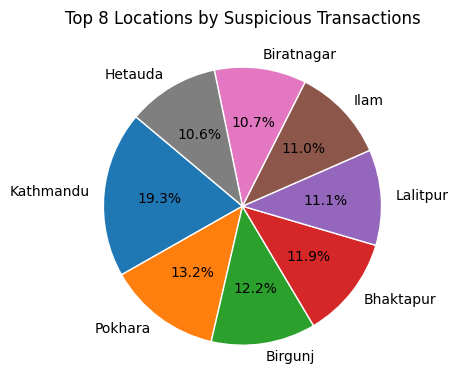

In [26]:
# Reset index so 'location' becomes a column
sus_by_location_reset = sus_by_location.reset_index()

# Select top 10 locations by fraud count (sum)
top10_locations = sus_by_location_reset.head(8)

plt.figure(figsize=(8, 4))

plt.pie(
    top10_locations['sum'],
    labels=top10_locations['location'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title('Top 8 Locations by Suspicious Transactions')
plt.tight_layout()
plt.show()

The pie chart shows that Kathmandu, Pokhara, and Birgunj have the highest counts of suspicious transactions, likely due to higher transaction volumes in these urban centers. However, some smaller or international locations (e.g., Delhi, Abu Dhabi, Bangkok) show extremely high fraud rates relative to their transaction volume, indicating concentrated or isolated high-risk activity. Overall, fraud appears both in major cities and select high-risk locations abroad.

Solving strategies:

    -Location-Based Risk Prioritization: 
Focus controls on locations with highest fraud counts.

    -High Fraud-Rate Flagging: 
Auto-flag locations with near-100% fraud rates.

    -Tier-Based Risk Classification: 
Assign locations to risk levels using thresholds.

    -Dual-Metric Decision Rule: 
Evaluate risk using both fraud count and fraud rate.

    -Adaptive International Rules: 
Apply stricter rules to high-risk foreign locations.

    -Visualization-Driven Decisions:
Use charts to quickly identify major risk sources.

    -Predictive & Preventive Strategy: 
Use historical location data to prevent future fraud.

## 4. Suspicious based on age group

In [27]:
dataset['age_group'] = pd.Categorical(
 dataset['age_group'],
 ordered=True,
 categories=['18-25', '26-35', '36-45', '46-55', '56+']
)
dataset.groupby('age_group')['is_suspicious'].sum()

C:\Users\saisa\AppData\Local\Temp\ipykernel_1520\104793493.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.groupby('age_group')['is_suspicious'].sum()


age_group
18-25    1070
26-35    2032
36-45    1526
46-55    1104
56+         0
Name: is_suspicious, dtype: int64

In [28]:
age_sus = dataset.groupby('age_group', as_index=False)['is_suspicious'].sum()

C:\Users\saisa\AppData\Local\Temp\ipykernel_1520\2659529897.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sus = dataset.groupby('age_group', as_index=False)['is_suspicious'].sum()


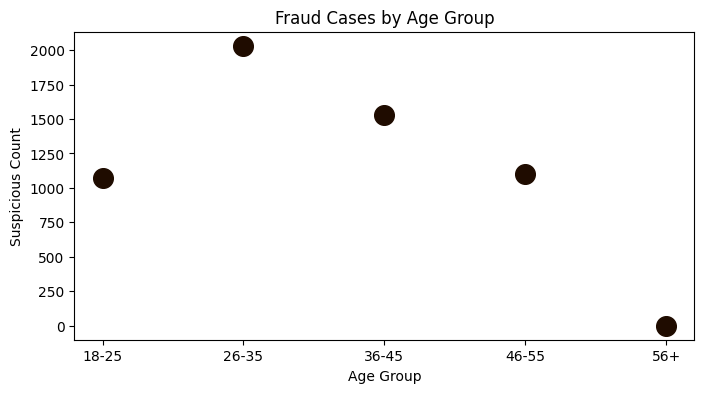

In [29]:
plt.figure(figsize=(8, 4))
plt.scatter(age_sus['age_group'], age_sus['is_suspicious'], s=200, color='#1f0c00')
plt.title("Fraud Cases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Suspicious Count")
plt.show()

The scatter plot shows that the 26-35 age group has the highest number of suspicious transactions, followed by 36-45 and 18-25. Activity declines for older age groups, with no cases recorded for 56+, suggesting that younger and middle-aged users are more involved in high-risk or fraudulent transactions.

Solving strategies:

    - Age-Based Risk Prioritization: 
Focus fraud controls on age groups with highest suspicious counts (26–35, 36–45).

    - High-Risk Age Group Flagging: 
Automatically flag transactions from peak-risk age segments.

    - Tier-Based Age Risk Classification: 
Classify age groups into low, medium, and high risk tiers.

    - Dual-Metric Age Evaluation: 
Assess risk using both suspicious count and user activity level per age group.

    - Targeted Preventive Rules: 
Apply stricter verification for younger and middle-aged users.

    - Visualization-Driven Insight: 
Scatter plot highlights age segments contributing most to fraud.

    - Predictive Age Profiling: 
Use historical age-based patterns to anticipate future fraud behavior.

## 5. Suspicious based on auth_method

In [30]:
sus_by_auth_method = (
    dataset.groupby('auth_method')['is_suspicious']
    .agg(['sum', 'count'])
    .sort_values(by='count', ascending=False)
    .reset_index()      # FIX
)
print(sus_by_auth_method)

           auth_method   sum  count
0             Password  2536  20307
1                  PIN  1312  19354
2                  OTP  1351  19115
3     Face Recognition   609  18444
4          Fingerprint   614  18192
5  Manual Verification   339   8088


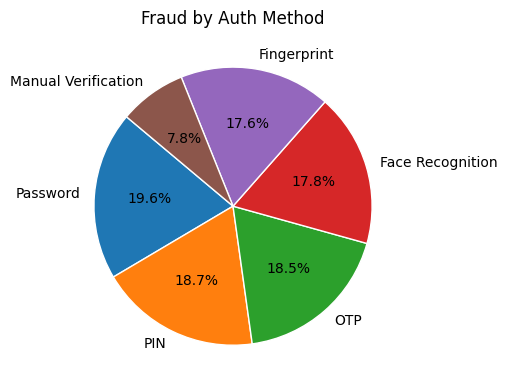

In [31]:
plt.figure(figsize=(8,4))
plt.pie(
    sus_by_auth_method['count'],
    labels=sus_by_auth_method['auth_method'],   
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Fraud by Auth Method')
plt.tight_layout()
plt.show()

The pie chart indicates that most transactions, and consequently most suspicious activity, occur via Password, PIN, and OTP authentication, reflecting their high usage. Biometric methods like Face Recognition and Fingerprint show lower transaction counts and fewer fraud cases, while Manual Verification accounts for the smallest share. This suggests that traditional authentication methods remain the dominant channels for both normal and suspicious activity.

Solving strategies:

    - Auth-Method Risk Prioritization: 
Prioritize monitoring of high-usage methods like Password, PIN, and OTP.

    - High-Exposure Method Flagging: 
Flag traditional authentication methods due to higher fraud exposure.

    - Tier-Based Auth Risk Classification: 
Classify authentication methods into low and high risk tiers.

    - Dual-Metric Auth Evaluation: 
Assess risk using both suspicious counts and total transaction volume.

    - Adaptive Security Controls: 
Enforce stronger checks for password-based and PIN-based logins.

    - Visualization-Driven Insight: 
Pie chart highlights dominant authentication channels contributing to fraud.

    - Preventive Auth Strategy: 
Promote biometric authentication to reduce fraud risk.

In [32]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
ms_avg_monthly_income = MinMaxScaler(feature_range=(0, 1))
ms_amount = MinMaxScaler(feature_range=(0, 1))
ms_credit_score = MinMaxScaler(feature_range=(0, 1))
ms_avg_transaction_amount = MinMaxScaler(feature_range=(0, 1))
ms_amount_deviation = MinMaxScaler(feature_range=(0, 1))

In [33]:
#Initialize separate LabelEncoder instances for each categorical column
from sklearn.preprocessing import LabelEncoder
le_age_group = LabelEncoder()
le_home_location = LabelEncoder()
le_account_type = LabelEncoder()
le_mobile_banking_user = LabelEncoder()
le_primary_device = LabelEncoder()
le_primary_os = LabelEncoder()
le_primary_browser = LabelEncoder()
le_employment_status = LabelEncoder()
le_preferred_transaction_types = LabelEncoder()
le_location = LabelEncoder()
le_time_of_day = LabelEncoder()
le_status = LabelEncoder()
le_auth_method = LabelEncoder()
le_is_suspicious = LabelEncoder()
le_transaction_type = LabelEncoder()

In [34]:
# Apply label encoding to all categorical features
dataset["age_group"] = le_age_group.fit_transform(dataset["age_group"])
dataset["home_location"] = le_home_location.fit_transform(dataset["home_location"])
dataset["account_type"] = le_account_type.fit_transform(dataset["account_type"])
dataset["mobile_banking_user"] = le_mobile_banking_user.fit_transform(dataset["mobile_banking_user"])
dataset["primary_device"] = le_primary_device.fit_transform(dataset["primary_device"])
dataset["primary_os"] = le_primary_os.fit_transform(dataset["primary_os"])
dataset["primary_browser"] = le_primary_browser.fit_transform(dataset["primary_browser"])
dataset["employment_status"] = le_employment_status.fit_transform(dataset["employment_status"])
dataset["preferred_transaction_types"] = le_preferred_transaction_types.fit_transform(dataset["preferred_transaction_types"])
dataset["location"] = le_location.fit_transform(dataset["location"])
dataset["time_of_day"] = le_time_of_day.fit_transform(dataset["time_of_day"])
dataset["status"] = le_status.fit_transform(dataset["status"])
dataset["auth_method"] = le_auth_method.fit_transform(dataset["auth_method"])
dataset["is_suspicious"] = le_is_suspicious.fit_transform(dataset["is_suspicious"])
dataset["transaction_type"] = le_transaction_type.fit_transform(dataset["transaction_type"])

In [35]:
dataset.head()

,customer_id,age_group,home_location,credit_score,account_age_years,account_type,avg_monthly_income,mobile_banking_user,primary_device,primary_os,...,transaction_type,amount,location,ip_address,time_of_day,transaction_velocity,status,auth_method,amount_deviation,is_suspicious
0,1,1,21,714,13,3,55580.825844,1,4,3,...,11,9707.23,40,27.86.22.5,2,1,1,0,1.493718,0
1,1,1,21,714,13,3,55580.825844,1,4,3,...,11,5044.32,40,210.62.41.218,2,1,1,5,0.776204,0
2,1,1,21,714,13,3,55580.825844,1,4,3,...,24,7876.14,40,210.51.34.80,3,1,1,0,1.211956,0
3,1,1,21,714,13,3,55580.825844,1,4,3,...,18,8033.46,40,43.26.97.5,1,4,1,4,1.236164,0
4,1,1,21,714,13,3,55580.825844,1,4,3,...,13,8398.52,40,103.233.246.4,1,1,1,3,1.292338,0


In [36]:
dataset.dtypes

customer_id                      int64
age_group                        int64
home_location                    int64
credit_score                     int64
account_age_years                int64
account_type                     int64
avg_monthly_income             float64
mobile_banking_user              int64
primary_device                   int64
primary_os                       int64
primary_browser                  int64
avg_transaction_amount         float64
transaction_frequency            int64
employment_status                int64
preferred_transaction_types      int64
international_activity            bool
risk_score                       int64
transaction_id                  object
transaction_date                object
transaction_type                 int64
amount                         float64
location                         int64
ip_address                      object
time_of_day                      int64
transaction_velocity             int64
status                   

In [37]:
dataset['transaction_id'].nunique()

103492

In [38]:
dataset['transaction_date'].nunique()

98133

In [39]:
dataset.drop(columns=['ip_address', 'transaction_id', 'transaction_date'], inplace=True)

In [40]:
X = dataset.drop(columns=['is_suspicious'])
y = dataset['is_suspicious']
X.ndim

2

In [41]:
# Split data into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [42]:
# Train an SVM classifier and make predictions on the test set
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:
# Evaluate the model's accuracy on the test set
model.score(X_test,y_test)

0.9715169082125604

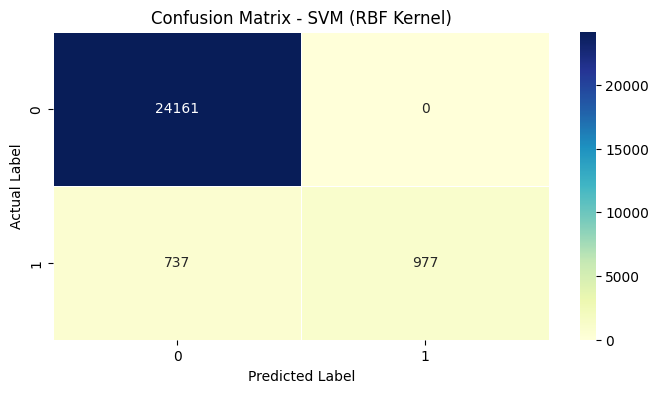

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot heatmap
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - SVM (RBF Kernel)")
plt.show()

The SVM classifier with RBF kernel achieved a high accuracy of approximately 97.15% on the test set, indicating strong predictive performance. The confusion matrix shows that most transactions are correctly classified, with very few misclassifications between suspicious and non-suspicious cases, suggesting the model effectively distinguishes between the two classes.

In [104]:
#!pip install -U "nbconvert[webpdf]"

In [111]:
!jupyter nbconvert --to webpdf "C:\Users\saisa\Downloads\dss.ipynb --output="dss.pdf" --allow-chromium-download

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'C:\\Users\\saisa\\Downloads\\dss.ipynb --output=Saisa_dss.pdf --allow-chromium-download' matched no files


In [112]:
# correct convert command
!jupyter nbconvert --to webpdf "C:/Users/saisa/Downloads/dss.ipynb" --output "Saisa_dss" --allow-chromium-download

|                                                                                |   0% of 148.9 MiB
|â– â– â– â– â– â– â– â–                                                                         |  10% of 148.9 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                                                 |  20% of 148.9 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                                         |  30% of 148.9 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                                 |  40% of 148.9 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                         |  50% of 148.9 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–          

[NbConvertApp] Converting notebook C:/Users/saisa/Downloads/dss.ipynb to webpdf
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 554456 bytes to C:\Users\saisa\Downloads\Saisa_dss.pdf
